# Compustat World Firms Industry Classification

# 2. EDA (Final)

##  Import Libraries and Load Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

compustat = pd.read_pickle('../data/compustat_ftreng.pkl')

In [25]:
compustat.shape

(2748178, 139)

In [26]:
compustat.head()

,gsector_num,gsector,gvkey,datafqtr,fyearq,fqtr,loc,curcdq,saleq,gpq,...,cr_mean_8Q,cr_std_8Q,tdr_mean_4Q,tdr_std_4Q,tdr_mean_8Q,tdr_std_8Q,der_mean_4Q,der_std_4Q,der_mean_8Q,der_std_8Q
66,2.0,Industrials,1004,2000Q1,2000,1.0,USA,USD,241.770,39.109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,2.0,Industrials,1004,2000Q2,2000,2.0,USA,USD,211.335,39.853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,2.0,Industrials,1004,2000Q3,2000,3.0,USA,USD,200.071,40.534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,2.0,Industrials,1004,2000Q4,2000,4.0,USA,USD,221.079,40.948,...,NaN,NaN,0.296097,0.013844,NaN,NaN,0.646195,0.051509,NaN,NaN
70,2.0,Industrials,1004,2001Q1,2001,1.0,USA,USD,202.993,34.164,...,NaN,NaN,0.303825,0.025066,NaN,NaN,0.665448,0.074448,NaN,NaN


In [27]:
a=compustat.isna().mean().round(3) * 100
a[a>0]

saleq           9.8
gpq             8.7
oiadpq         18.1
oibdpq         11.6
cogsq          11.5
               ... 
tdr_std_8Q     53.6
der_mean_4Q    44.3
der_std_4Q     44.3
der_mean_8Q    53.6
der_std_8Q     53.6
Length: 131, dtype: float64

array([[<Axes: title={'center': 'gsector_num'}>,
        <Axes: title={'center': 'gvkey'}>,
        <Axes: title={'center': 'fyearq'}>,
        <Axes: title={'center': 'fqtr'}>,
        <Axes: title={'center': 'saleq'}>,
        <Axes: title={'center': 'gpq'}>,
        <Axes: title={'center': 'oiadpq'}>,
        <Axes: title={'center': 'oibdpq'}>,
        <Axes: title={'center': 'cogsq'}>,
        <Axes: title={'center': 'xoprq'}>,
        <Axes: title={'center': 'atq'}>,
        <Axes: title={'center': 'seqq'}>],
       [<Axes: title={'center': 'dlcq'}>,
        <Axes: title={'center': 'dlttq'}>,
        <Axes: title={'center': 'capxy'}>,
        <Axes: title={'center': 'oancfy'}>,
        <Axes: title={'center': 'gpm'}>, <Axes: title={'center': 'opm'}>,
        <Axes: title={'center': 'ocfm'}>,
        <Axes: title={'center': 'roa'}>, <Axes: title={'center': 'roe'}>,
        <Axes: title={'center': 'cd_ratio'}>,
        <Axes: title={'center': 'ca_ratio'}>,
        <Axes: title={'cen

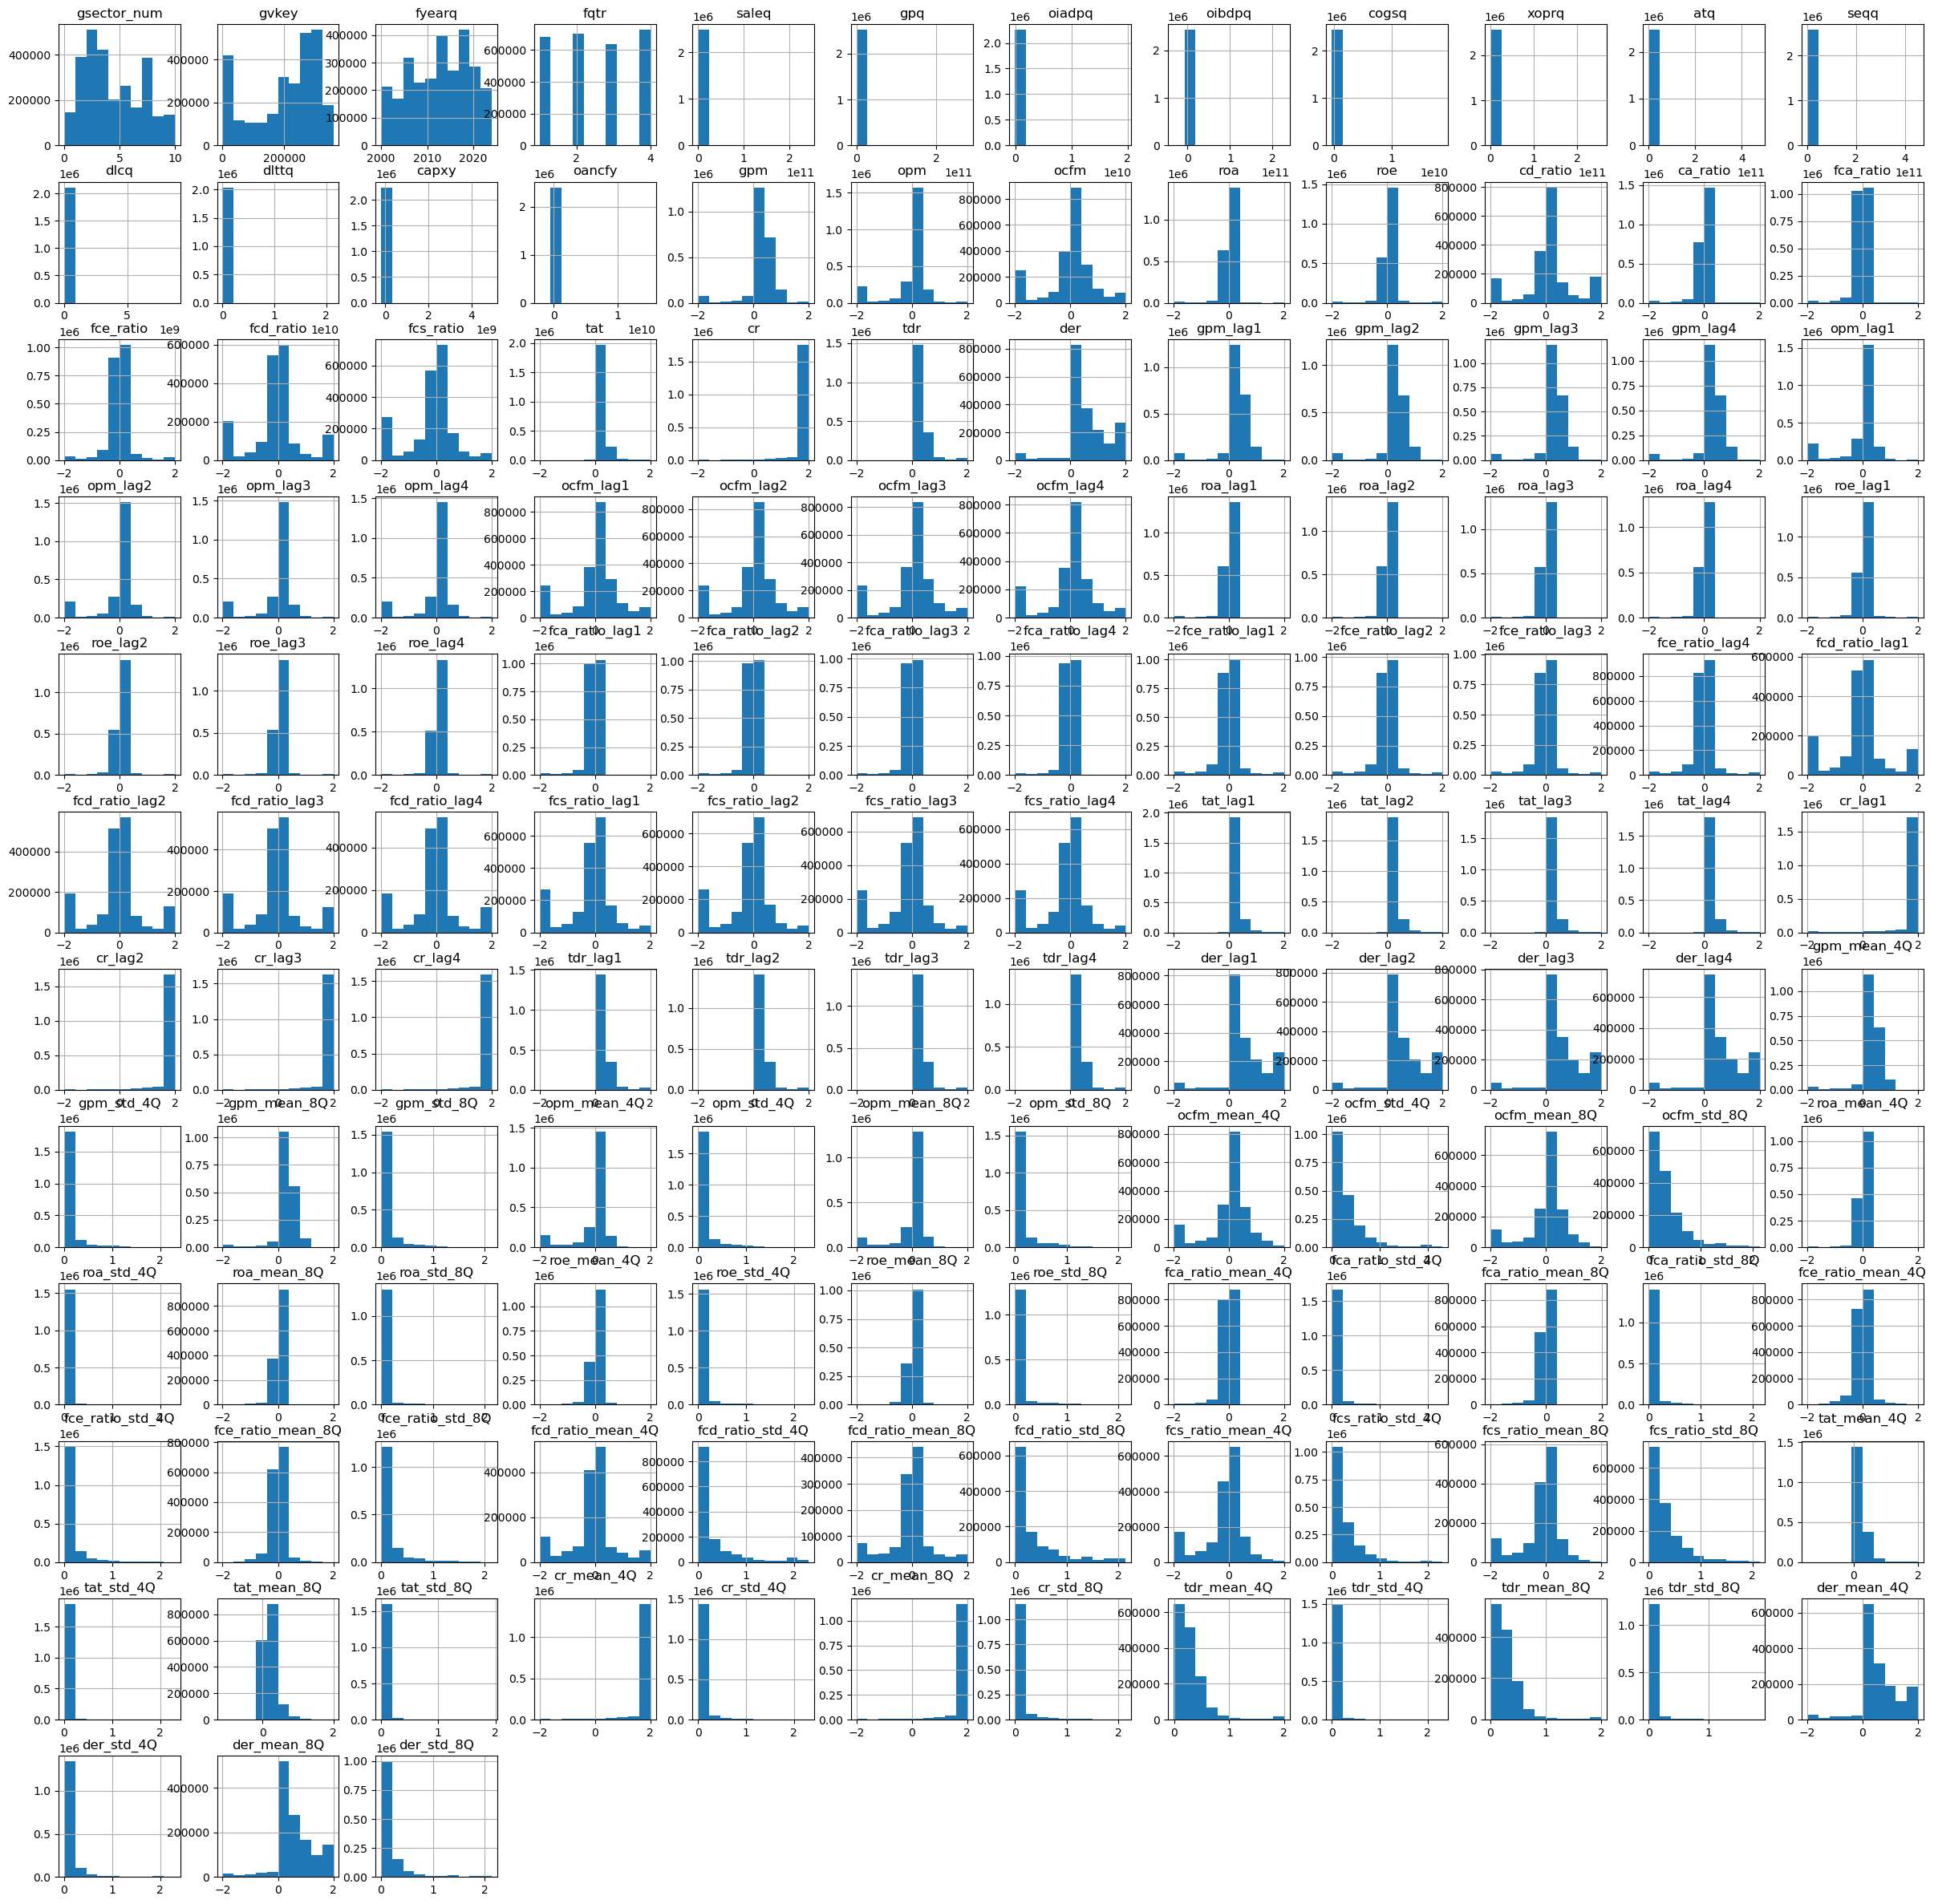

In [28]:
compustat.hist(figsize=(30,30))

## EDA Plots

In [29]:
sorted_unique_periods = compustat['datafqtr'].sort_values().unique()

/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

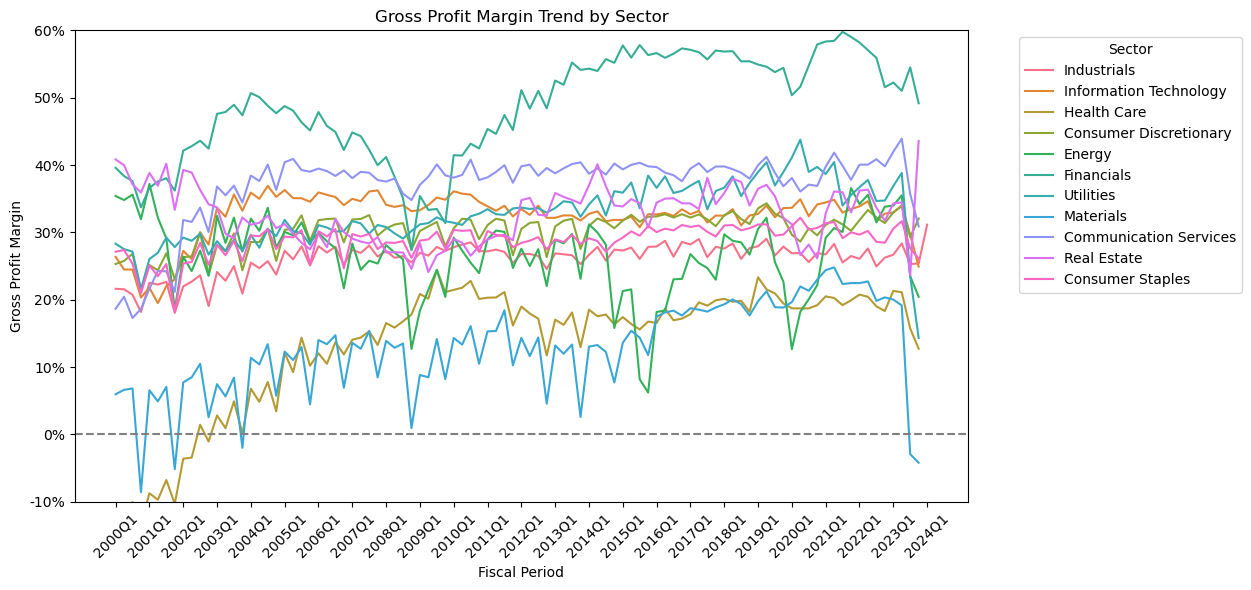

In [30]:
# Create the lineplot with confidence interval
fig1 = plt.figure(figsize=(15, 6))
sns.lineplot(x='datafqtr', y='gpm', hue='gsector', errorbar=None, data=compustat)
plt.axhline(0, color='gray', linestyle='--')

# Add labeling and legends
plt.xlabel('Fiscal Period')
plt.ylabel('Gross Profit Margin')
plt.title('Gross Profit Margin Trend by Sector')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(-0.1,0.6)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
xticks = plt.xticks()[0]
plt.xticks(sorted_unique_periods[::4], labels=sorted_unique_periods[::4], rotation=45)
    
# Show the plot
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
fig1.savefig('../figures/industry_gpm_by_quarter.png', dpi=300)

/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

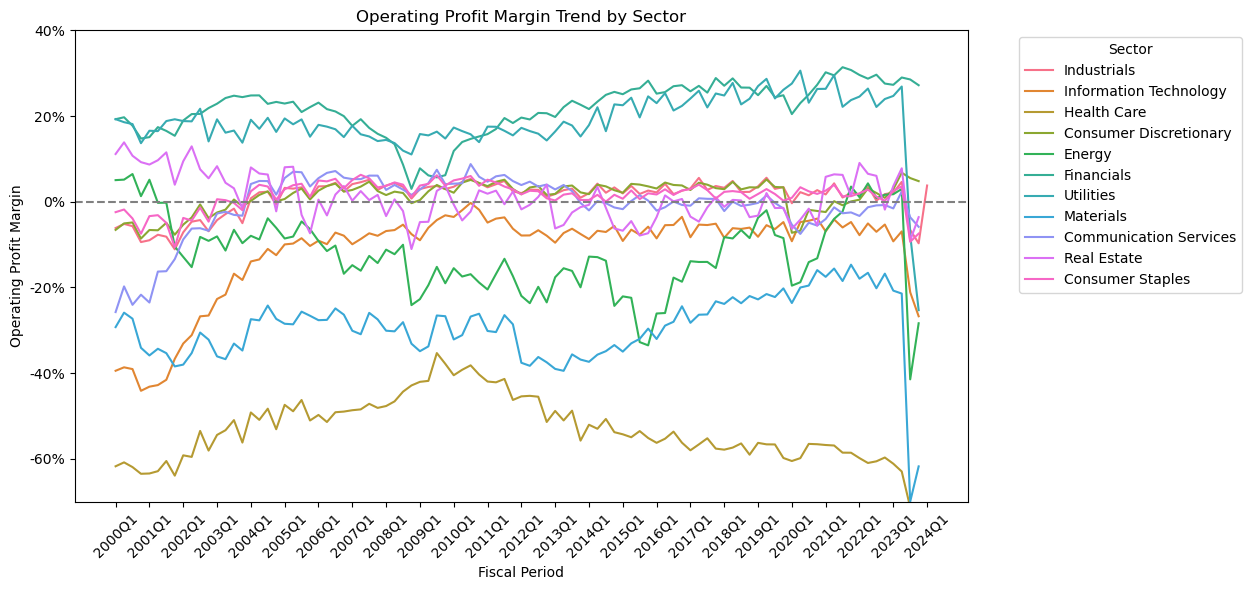

In [31]:
# Create the lineplot with confidence interval
fig2 = plt.figure(figsize=(15, 6))
sns.lineplot(x='datafqtr', y='opm', hue='gsector', errorbar=None, data=compustat)
plt.axhline(0, color='gray', linestyle='--')

# Add labeling and legends
plt.xlabel('Fiscal Period')
plt.ylabel('Operating Profit Margin')
plt.title('Operating Profit Margin Trend by Sector')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(-0.7,0.4)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
xticks = plt.xticks()[0]
plt.xticks(sorted_unique_periods[::4], labels=sorted_unique_periods[::4], rotation=45)
    
# Show the plot
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
fig2.savefig('../figures/industry_opm_by_quarter.png', dpi=300)

In [32]:
'''
UNUSED PLOTLY INTERACTIVE PLOT

import plotly.express as px
import pandas as pd

# Aggregate data by mean
agg_data = compustat.groupby(['datafqtr', 'gsector'])['opm'].mean().reset_index()

# Create the line plot
fig3 = px.line(agg_data, 
              x='datafqtr', 
              y='opm', 
              color='gsector',
              title='Time Series Plot with Confidence Bands')

# Customizations
fig3.update_layout(
    xaxis_title='Fiscal Period',
    yaxis_title='Gross Profit Margin',
    legend_title='Sector',
    yaxis=dict(tickformat=".0%"),
    xaxis=dict(tickvals=sorted_unique_periods[::4], ticktext=sorted_unique_periods[::4])
)

# Add horizontal line at y=0
fig3.add_hline(y=0, line_dash="dash", line_color="gray")

# Adjusting legend position
fig3.update_layout(legend=dict(
    yanchor="top",
    y=1,
    xanchor="left",
    x=1.05
))

# Display the plot
fig3.show()
# save the plot
#fig3.write_image('../figures/industry_opm_by_quarter_plotly.png', width=2000, height=1200)
'''

'\nUNUSED PLOTLY INTERACTIVE PLOT\n\nimport plotly.express as px\nimport pandas as pd\n\n# Aggregate data by mean\nagg_data = compustat.groupby([\'datafqtr\', \'gsector\'])[\'opm\'].mean().reset_index()\n\n# Create the line plot\nfig3 = px.line(agg_data, \n              x=\'datafqtr\', \n              y=\'opm\', \n              color=\'gsector\',\n              title=\'Time Series Plot with Confidence Bands\')\n\n# Customizations\nfig3.update_layout(\n    xaxis_title=\'Fiscal Period\',\n    yaxis_title=\'Gross Profit Margin\',\n    legend_title=\'Sector\',\n    yaxis=dict(tickformat=".0%"),\n    xaxis=dict(tickvals=sorted_unique_periods[::4], ticktext=sorted_unique_periods[::4])\n)\n\n# Add horizontal line at y=0\nfig3.add_hline(y=0, line_dash="dash", line_color="gray")\n\n# Adjusting legend position\nfig3.update_layout(legend=dict(\n    yanchor="top",\n    y=1,\n    xanchor="left",\n    x=1.05\n))\n\n# Display the plot\nfig3.show()\n# save the plot\n#fig3.write_image(\'../figures/indu

In [33]:
gic_to_sector = {
    0: 'Energy',
    1: 'Materials',
    2: 'Industrials',
    3: 'Consumer Discretionary',
    4: 'Consumer Staples',
    5: 'Health Care',
    6: 'Financials',
    7: 'Information Technology',
    8: 'Communication Services',
    9: 'Utilities',
    10: 'Real Estate'
}

/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed i

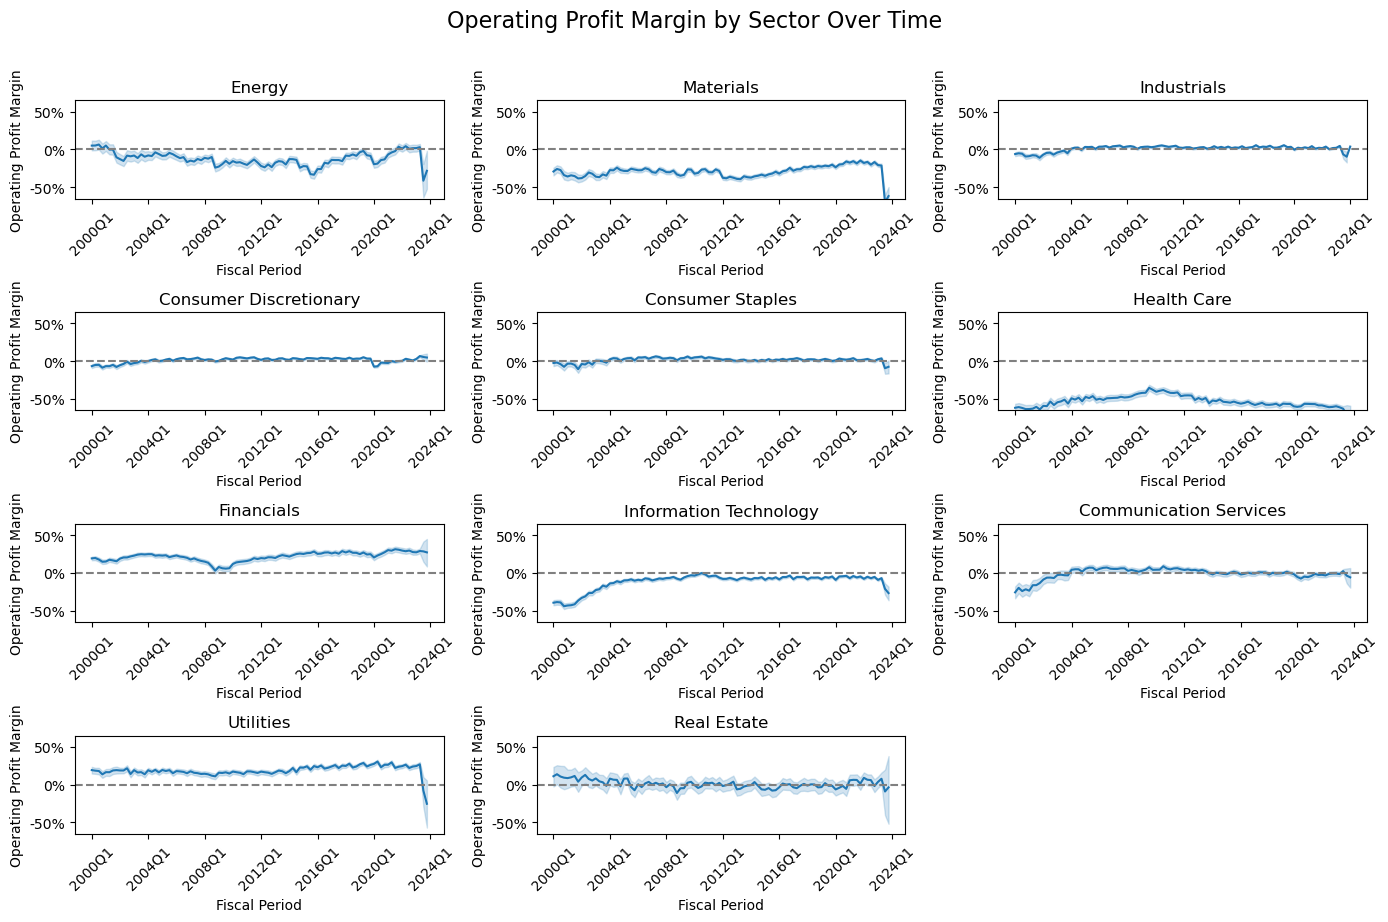

In [34]:
fig4, axes = plt.subplots(4, 3, figsize=(14, 9))
fig4.suptitle('Operating Profit Margin by Sector Over Time', fontsize=16, y=1.02)

# Flatten the axes array for easy indexing
axes = axes.flatten()
xtick_indices = range(0, len(sorted_unique_periods), 16)  # Adjust the step as needed

# Loop through each unique sector to create its own subplot
for i, sector in enumerate(gic_to_sector.values()):
    ax = axes[i]
    sns.lineplot(x='datafqtr', y='opm', data=compustat[compustat['gsector'] == sector], ax=ax)
    ax.axhline(0, color='gray', linestyle='--')
    ax.set_title(sector)
    ax.set_xlabel('Fiscal Period')
    ax.set_ylabel('Operating Profit Margin')
    ax.set_ylim(-0.65, 0.65)

    ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
    xticks = ax.get_xticks()
    ax.set_xticks(xtick_indices)
    ax.set_xticklabels(sorted_unique_periods[::16], rotation=45) 
    #ax.set_xticks(sorted_unique_periods_dt[::16])  # Set x-ticks with datetime objects
    #ax.set_xticklabels([label.strftime('%YQ%q') for label in sorted_unique_periods_dt[::16]], rotation=45)
 
# Remove any unused subplots
for i in range(len(gic_to_sector.values()), len(axes)):
    fig4.delaxes(axes[i])

plt.tight_layout()
plt.show()
fig4.savefig('../figures/industry_opm_by_sector.png', dpi=300)

/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/miniconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

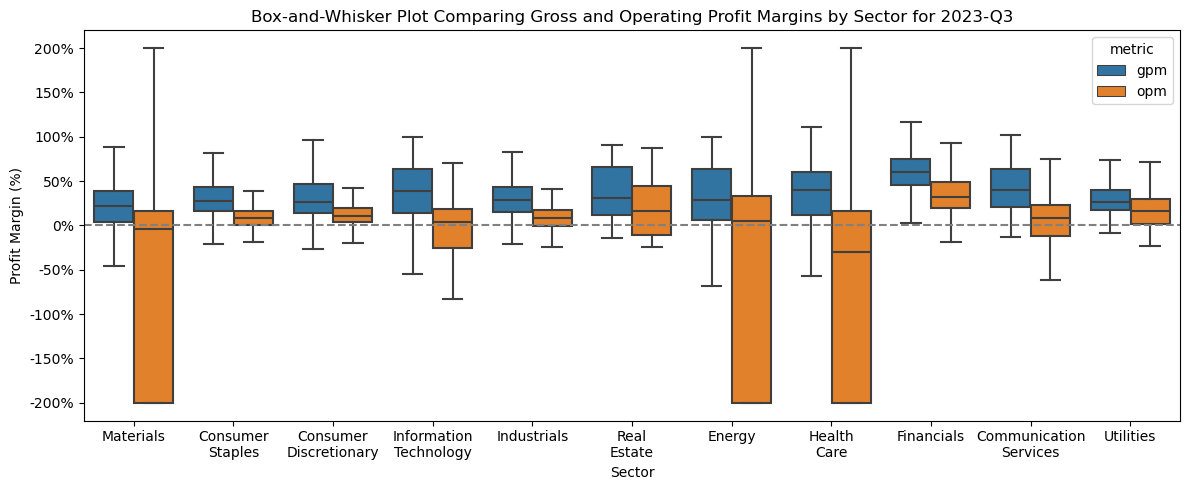

In [35]:
# Filter the DataFrame for the quarter 2023-Q3
filtered_data = compustat[compustat['datafqtr'] == '2023Q3']

# Melt the DataFrame to have 'metric' and 'value' columns
melted_data = filtered_data.melt(id_vars=['gsector', 'datafqtr'], value_vars=['gpm', 'opm'],
                                 var_name='metric', value_name='value')

# Create the box-and-whisker plot
fig5 = plt.figure(figsize=(12, 5))
sns.boxplot(x='gsector', y='value', hue='metric', data=melted_data, showfliers=False)

# Add labeling and titles
plt.xlabel('Sector')
plt.ylabel('Profit Margin (%)')
plt.title('Box-and-Whisker Plot Comparing Gross and Operating Profit Margins by Sector for 2023-Q3')
plt.axhline(0, color='gray', linestyle='--')

labels = [item.get_text() for item in plt.gca().get_xticklabels()]
new_labels = [label.replace(' ', '\n') for label in labels]
plt.xticks(ticks=plt.xticks()[0], labels=new_labels, rotation=0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

plt.tight_layout()
plt.show()
fig5.savefig('../figures/industry_opm_boxplot.png', dpi=300)

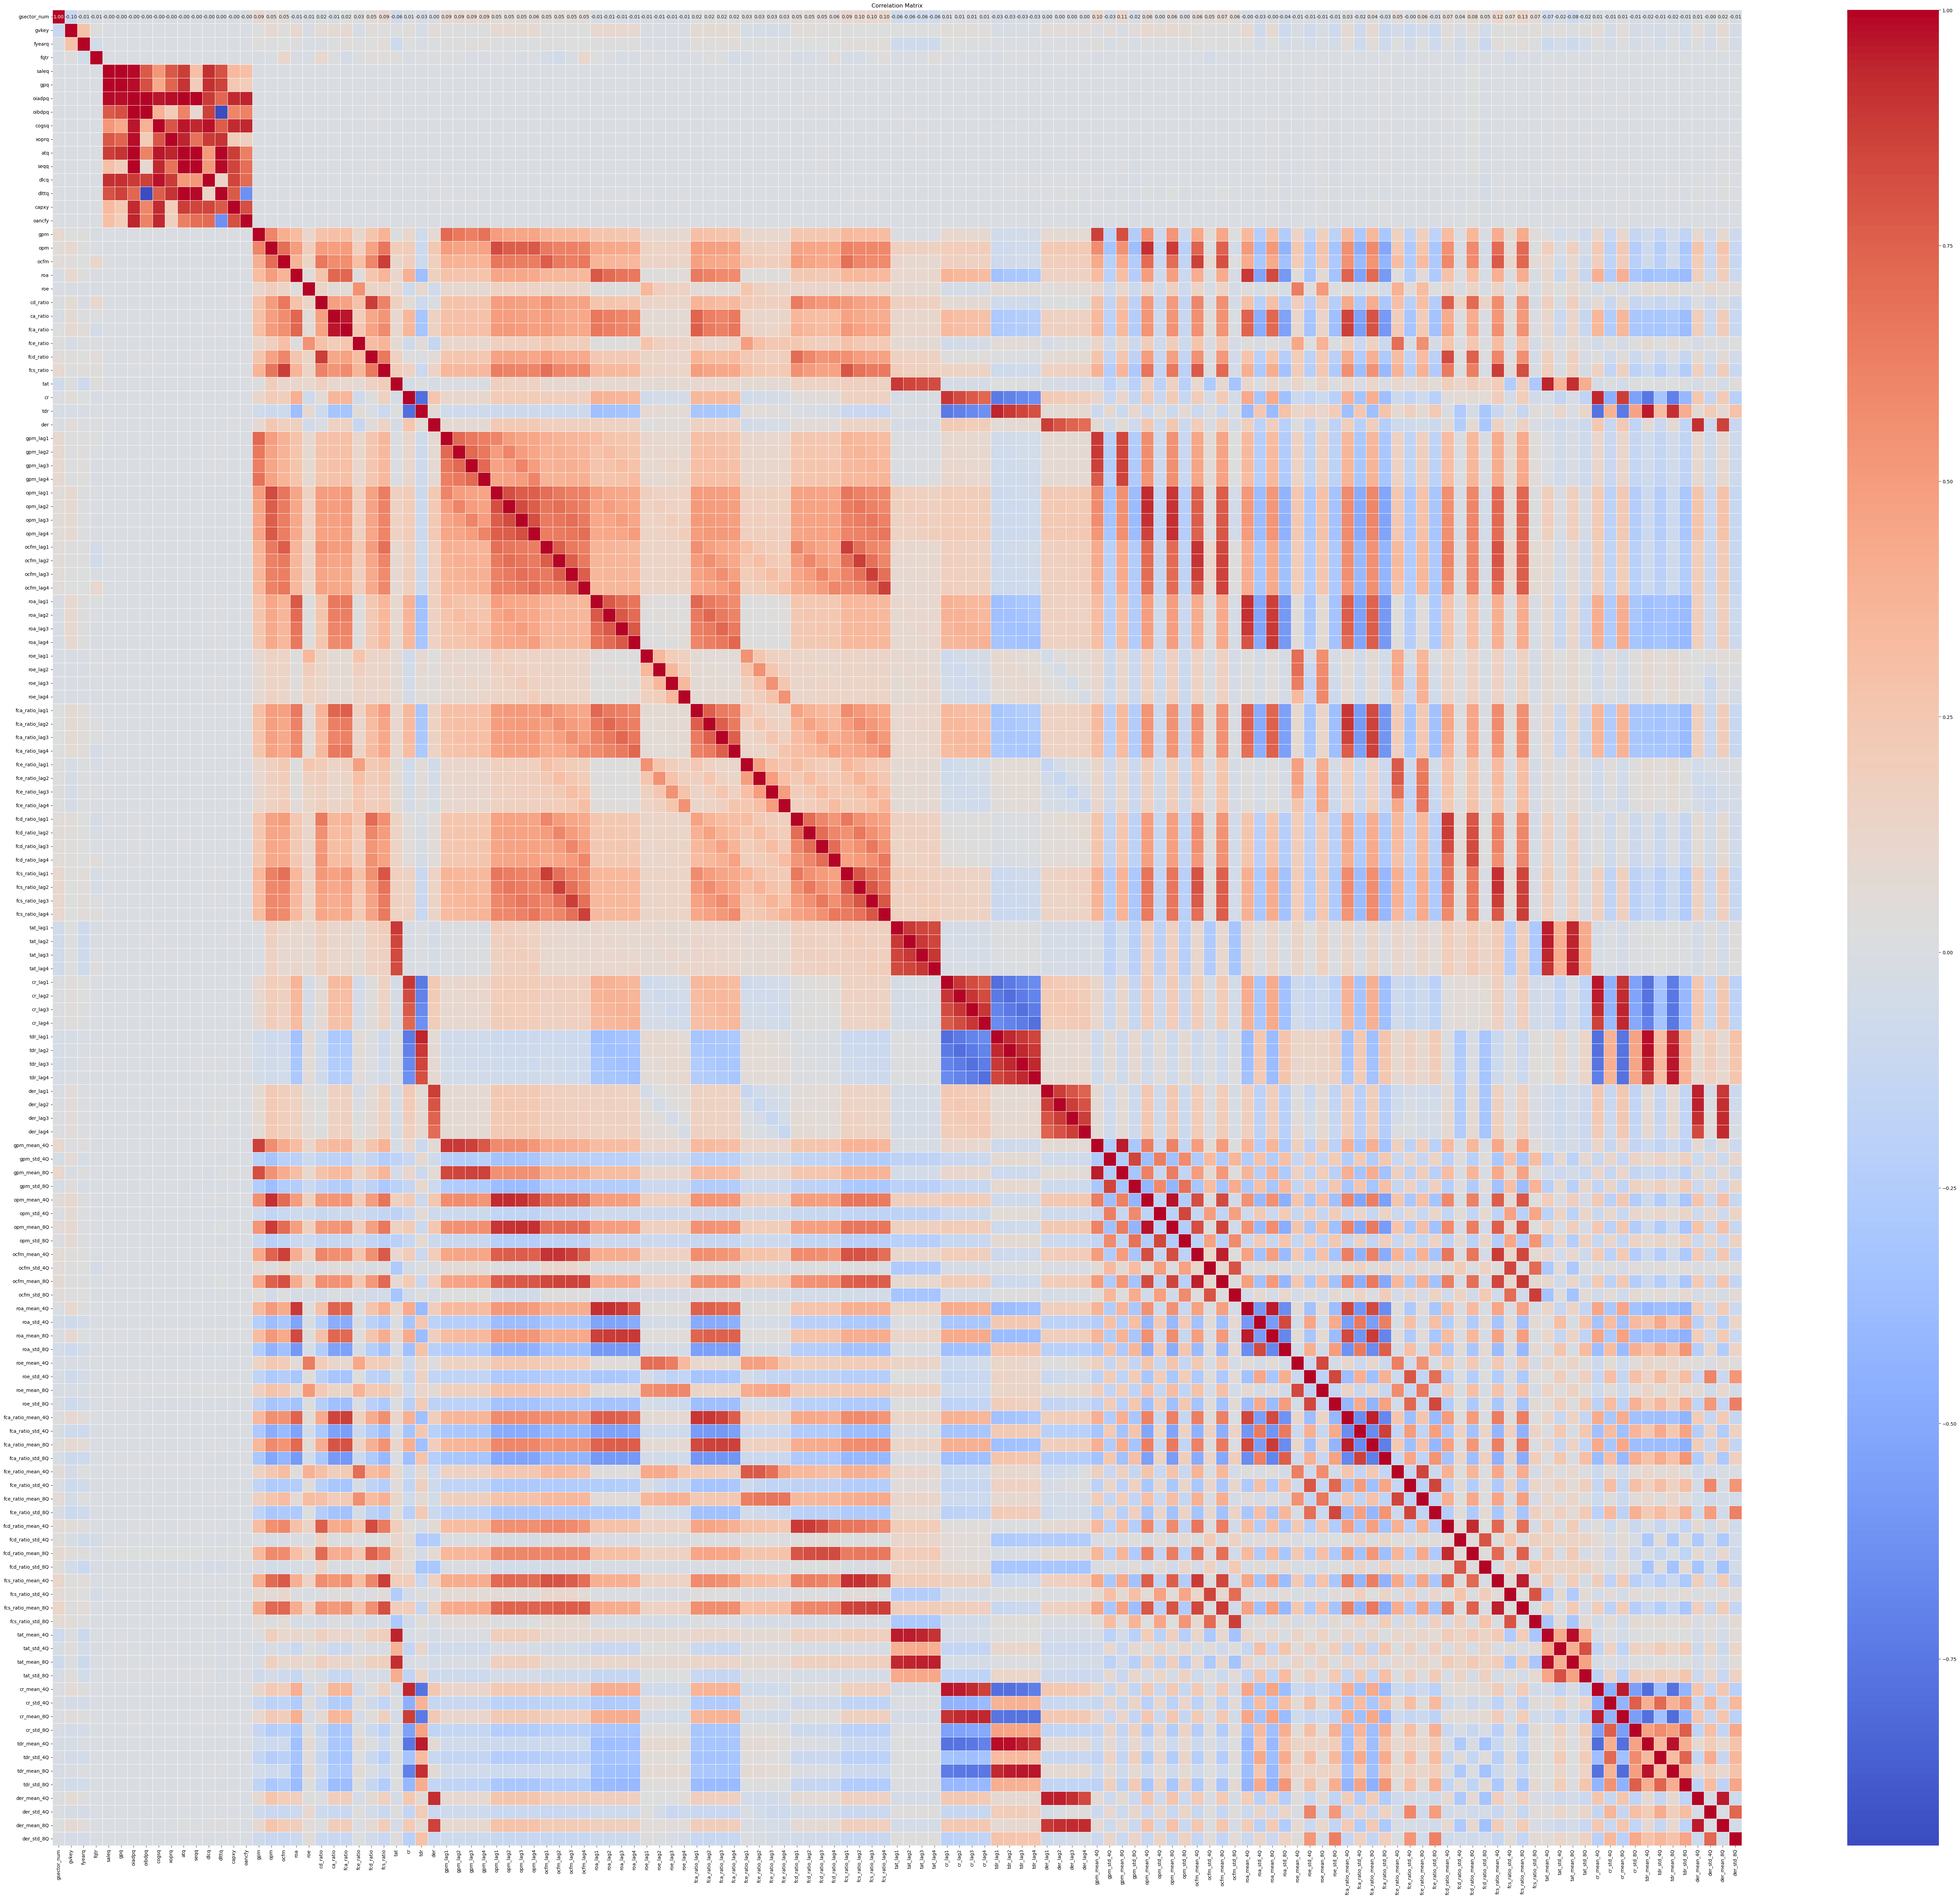

In [36]:
correlation_matrix = compustat.select_dtypes(include=[np.number]).corr()
fig6 = plt.figure(figsize=(80,70))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()
fig6.savefig('../figures/correlation_matrix.png', dpi=300)

In [37]:
compustat.shape

(2748178, 139)

In [10]:
compustat['gsector'].value_counts()

gsector
Industrials               508016
Consumer Discretionary    421159
Materials                 389118
Information Technology    385799
Health Care               262493
Consumer Staples          202318
Financials                167707
Energy                    147524
Communication Services    128289
Utilities                  87376
Real Estate                48379
Name: count, dtype: int64

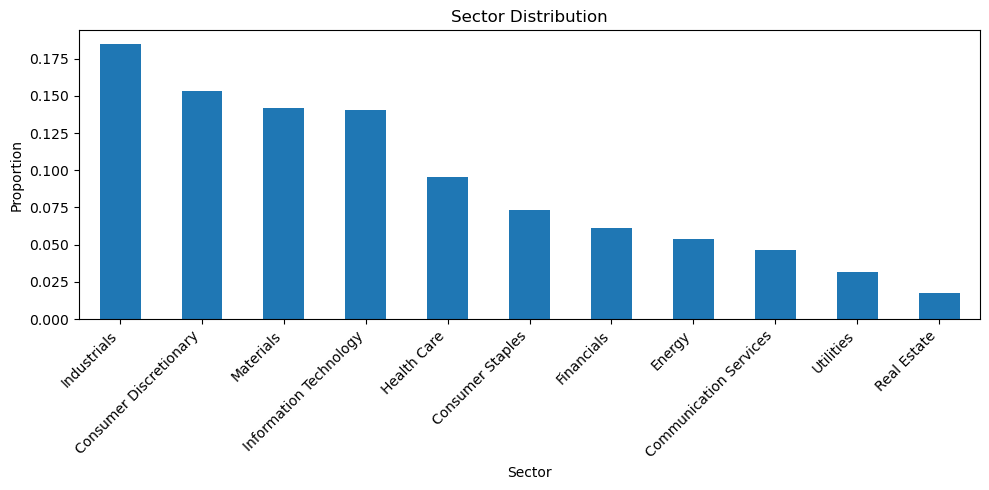

In [11]:
fig_sector_dist = plt.figure(figsize=(10,5))
(compustat['gsector'].value_counts()/compustat['gsector'].value_counts().sum()).plot(kind='bar')
plt.title('Sector Distribution')
plt.xlabel('Sector')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
fig_sector_dist.savefig('../figures/sector_distribution.png', dpi=300)

In [40]:
compustat.shape

(2748178, 139)

In [41]:
np.array(list(compustat.columns))

array(['gsector_num', 'gsector', 'gvkey', 'datafqtr', 'fyearq', 'fqtr',
       'loc', 'curcdq', 'saleq', 'gpq', 'oiadpq', 'oibdpq', 'cogsq',
       'xoprq', 'atq', 'seqq', 'dlcq', 'dlttq', 'capxy', 'oancfy', 'gpm',
       'opm', 'ocfm', 'roa', 'roe', 'cd_ratio', 'ca_ratio', 'fca_ratio',
       'fce_ratio', 'fcd_ratio', 'fcs_ratio', 'tat', 'cr', 'tdr', 'der',
       'gpm_lag1', 'gpm_lag2', 'gpm_lag3', 'gpm_lag4', 'opm_lag1',
       'opm_lag2', 'opm_lag3', 'opm_lag4', 'ocfm_lag1', 'ocfm_lag2',
       'ocfm_lag3', 'ocfm_lag4', 'roa_lag1', 'roa_lag2', 'roa_lag3',
       'roa_lag4', 'roe_lag1', 'roe_lag2', 'roe_lag3', 'roe_lag4',
       'fca_ratio_lag1', 'fca_ratio_lag2', 'fca_ratio_lag3',
       'fca_ratio_lag4', 'fce_ratio_lag1', 'fce_ratio_lag2',
       'fce_ratio_lag3', 'fce_ratio_lag4', 'fcd_ratio_lag1',
       'fcd_ratio_lag2', 'fcd_ratio_lag3', 'fcd_ratio_lag4',
       'fcs_ratio_lag1', 'fcs_ratio_lag2', 'fcs_ratio_lag3',
       'fcs_ratio_lag4', 'tat_lag1', 'tat_lag2', 'tat_lag3', '